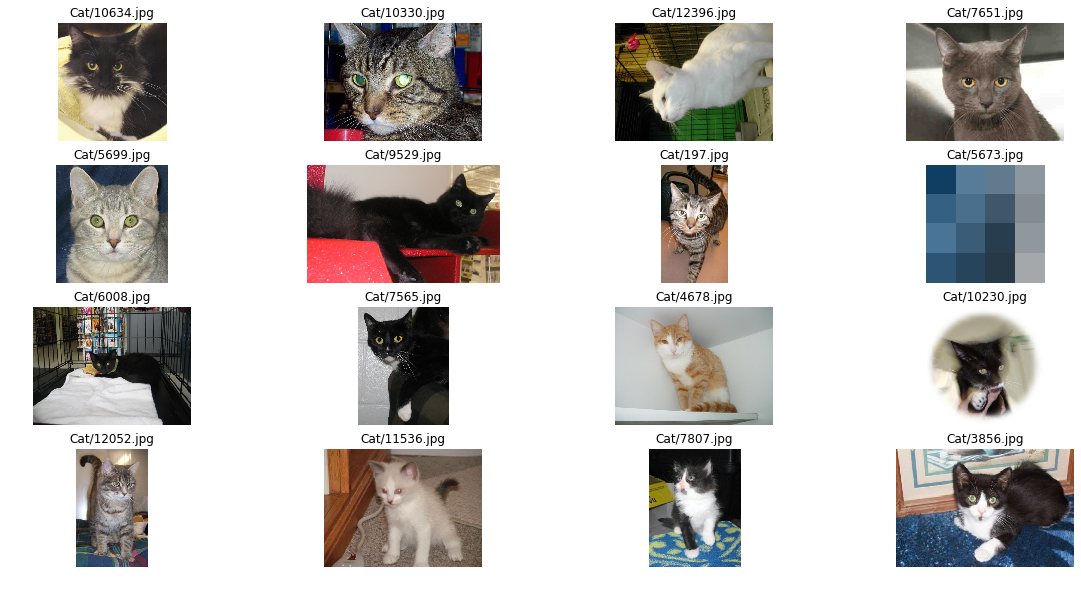

In [2]:
from matplotlib import pyplot as plt
import os
import random


### plot the images to better understand the cat images data

_, _, cat_images = next(os.walk('Cat'))

### prepare a 4x4 plot (total of 16 images)
fig, ax = plt.subplots(4, 4, figsize=(20,10))

### randomly select and plot an image
for idx, img in enumerate(random.sample(cat_images, 16)):
    img_read = plt.imread('Cat/'+img)
    ax[int(idx/4), idx%4].imshow(img_read)
    ax[int(idx/4), idx%4].axis('off')
    ax[int(idx/4), idx%4].set_title('Cat/'+img)
plt.show()
                        

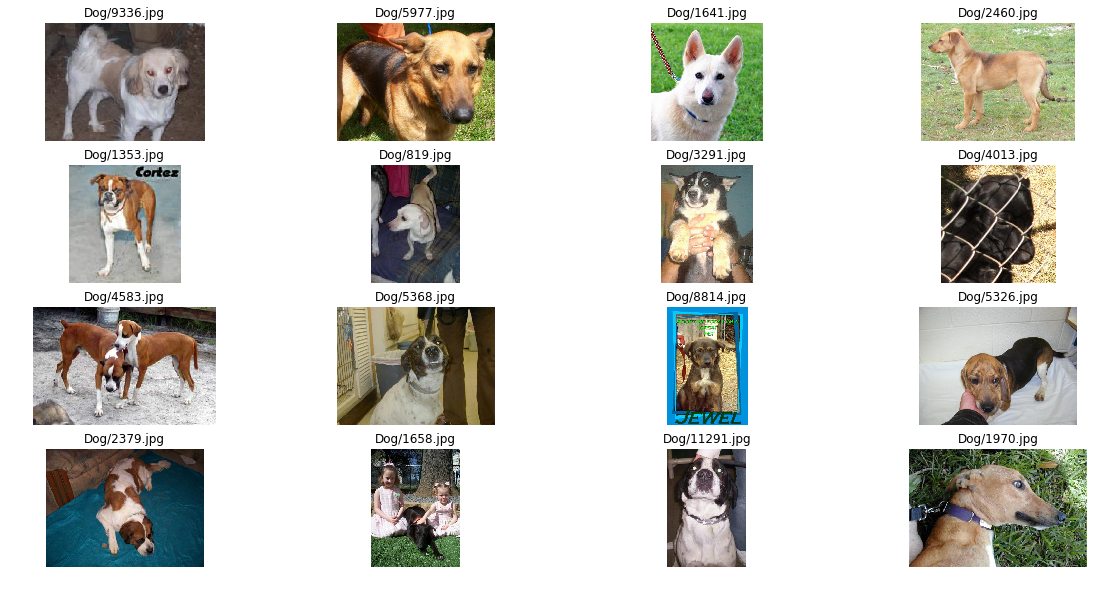

In [5]:
### plot the images to better understand the dog images data


_, _, dog_images = next(os.walk('Dog'))

### prepare a 4x4 plot (total of 16 images)
fig, ax = plt.subplots(4, 4, figsize=(20,10))

### randomly select and plot an image
for idx, img in enumerate(random.sample(dog_images, 16)):
    img_read = plt.imread('Dog/'+img)
    ax[int(idx/4), idx%4].imshow(img_read)
    ax[int(idx/4), idx%4].axis('off')
    ax[int(idx/4), idx%4].set_title('Dog/'+img)
plt.show()

In [6]:
#from utils import train_test_split

#src_folder = 'PetImages'
#train_test_split(src_folder)

In [7]:
#### image augmentation

from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.2,
                                     height_shift_range = 0.2, zoom_range = 0.2,
                                     horizontal_flip =True, fill_mode ='nearest')

In [8]:
from keras.models import Sequential
from keras.layers import  Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

Filter_size = 3
num_filters = 32
input_size = 32
maxpool_size = 2
batch_size = 16
steps_per_epoch = 20000//batch_size
epochs = 10

### add the first convolution and max pooling layers
model.add(Convolution2D(num_filters, (Filter_size, Filter_size), input_shape = (input_size, input_size, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size =(maxpool_size, maxpool_size)))

###  add the second convolution and max pooling layers
model.add(Convolution2D(num_filters, (Filter_size, Filter_size), input_shape = (input_size, input_size, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size =(maxpool_size, maxpool_size)))

### transform multidimensional vector into single dimensional vector by using flatten function
model.add(Flatten())

### add s fully connected layer
model.add(Dense(units = 128, activation ='relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 1, activation ='sigmoid'))

##################################################################
### compile the model by using opttimizer stochastic gradient descent algorithm

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics= ['accuracy'])

####################################################################
### train the CNN model
training_data_generator = ImageDataGenerator(rescale =1./255)

training_set = training_data_generator.flow_from_directory('PetImagesTrain', target_size=(input_size, input_size), batch_size=batch_size, class_mode='binary')

model.fit_generator(training_set, steps_per_epoch = steps_per_epoch, epochs = epochs, verbose=1)

Found 8005 images belonging to 2 classes.
Epoch 1/10
1250/1250 [==============================] - 185s 148ms/step - loss: 0.6237 - accuracy: 0.6430 - loss: 0.6238 - accuracy: 0.64
Epoch 2/10
1250/1250 [==============================] - 244s 195ms/step - loss: 0.5069 - accuracy: 0.7521 - loss: 0.5078 - 
Epoch 3/10
1250/1250 [==============================] - 268s 215ms/step - loss: 0.4282 - accuracy: 0.7996
Epoch 4/10
1250/1250 [==============================] - 282s 226ms/step - loss: 0.3609 - accuracy: 0.8389 - loss: 0.3610 - accuracy: 0.
Epoch 5/10
1250/1250 [==============================] - 283s 226ms/step - loss: 0.2848 - accuracy: 0.8786 - loss: 0.2848 - accu
Epoch 6/10
1250/1250 [==============================] - 520s 416ms/step - loss: 0.2150 - accuracy: 0.9108
Epoch 7/10
1250/1250 [==============================] - 811s 649ms/step - loss: 0.1631 - accuracy: 0.9354
Epoch 8/10
1250/1250 [==============================] - 653s 522ms/step - loss: 0.1288 - accuracy: 0.9507
Epoch 9/

In [9]:
### evaluate the performance of the model by testing set 

testing_data_generator = ImageDataGenerator(rescale =1./255)

test_set = testing_data_generator.flow_from_directory('PetImagesTest', target_size=(input_size, input_size), batch_size=batch_size, class_mode='binary')
score = model.evaluate_generator(test_set, steps= len(test_set))

for idx, metric in enumerate(model.metrics_names):
    print("{} :  {}".format(metric, score[idx]))

Found 2023 images belonging to 2 classes.
loss :  3.1790733337402344
accuracy :  0.7454276084899902


In [10]:
### leveraging on pre trained model using transfer learning 
## use VGG16 model to make prediction on the cat and dog images

from keras.applications.vgg16 import VGG16

input_size = 48
vgg16 = VGG16(include_top = False, weights = 'imagenet', input_shape =(input_size, input_size, 3))

for layer in vgg16.layers:
    layer.trainable = False
    

from keras.models import Model
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_ = vgg16.input
output_ = vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1, activation='sigmoid')(last_layer)
model = Model(input= input_, output= last_layer)

batch_size = 16
steps_per_epoch = 200
epochs = 3

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics= ['accuracy'])

training_data_generator = ImageDataGenerator(rescale =1./255)
testing_data_generator = ImageDataGenerator(rescale =1./255)

training_set = training_data_generator.flow_from_directory('PetImagesTrain', target_size=(input_size, input_size), batch_size=batch_size, class_mode='binary')
test_set = testing_data_generator.flow_from_directory('PetImagesTest', target_size=(input_size, input_size), batch_size=batch_size, class_mode='binary')

model.fit_generator(training_set, steps_per_epoch = steps_per_epoch, epochs = epochs, verbose=1)

score = model.evaluate_generator(test_set, steps= len(test_set))

for idx, metric in enumerate(model.metrics_names):
    print("{} :  {}".format(metric, score[idx]))

C:\Users\Soona\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 302s 2s/step - loss: 0.6459 - accuracy: 0.6203
Epoch 2/3
200/200 [==============================] - 277s 1s/step - loss: 0.5894 - accuracy: 0.6927
Epoch 3/3
200/200 [==============================] - 299s 1s/step - loss: 0.5594 - accuracy: 0.7206
loss :  0.7176485657691956
accuracy :  0.7345526218414307
